=== МНОГОМЕРНОЕ ГАУССОВО РАСПРЕДЕЛЕНИЕ ===
Создаем независимые данные...
Поворачиваем данные на 45 градусов...
Ковариационная матрица:
[[ 0.14652375 -0.13248205]
 [-0.13248205  0.13711753]]


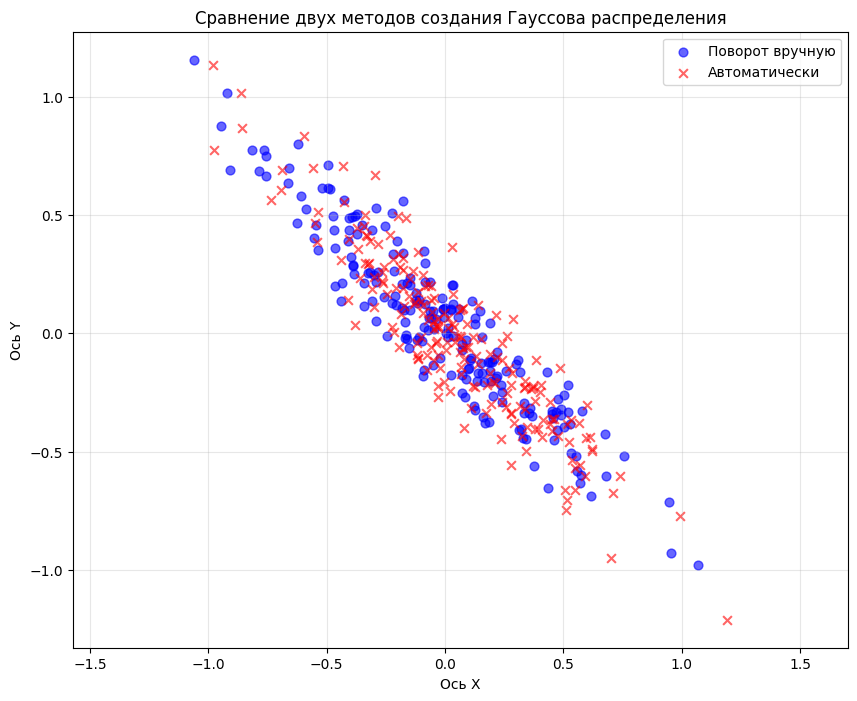

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("=== МНОГОМЕРНОЕ ГАУССОВО РАСПРЕДЕЛЕНИЕ ===")

#  ПАРАМЕТРЫ
num_points = 200    # Количество точек
sigma_x = 0.1       # Разброс по оси X
sigma_y = 0.5       # Разброс по оси Y (больше)
angle = 45          # Угол поворота в градусах

#  1. СОЗДАЕМ НЕЗАВИСИМЫЕ ДАННЫЕ
print("Создаем независимые данные...")
x = np.random.randn(num_points) * sigma_x
y = np.random.randn(num_points) * sigma_y
data_independent = np.column_stack((x, y))

#  2. ПОВОРАЧИВАЕМ ДАННЫЕ
print("Поворачиваем данные на 45 градусов...")
angle_rad = np.radians(angle)
rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad),  np.cos(angle_rad)]
])

data_rotated = data_independent @ rotation_matrix.T

#  3. СЧИТАЕМ КОВАРИАЦИЮ
covariance = np.cov(data_rotated.T)
print("Ковариационная матрица:")
print(covariance)

#  4. СОЗДАЕМ ТАКИЕ ЖЕ ДАННЫЕ ВТОРЫМ СПОСОБОМ
mean = [0, 0]  # Центр в начале координат
cov_matrix = rotation_matrix @ np.diag([sigma_x**2, sigma_y**2]) @ rotation_matrix.T

data_multivariate = np.random.multivariate_normal(mean, cov_matrix, num_points)

# 5. РИСУЕМ РЕЗУЛЬТАТЫ
plt.figure(figsize=(10, 8))

plt.scatter(data_rotated[:, 0], data_rotated[:, 1],
           alpha=0.6, color='blue', marker='o',
           label='Поворот вручную', s=40)

plt.scatter(data_multivariate[:, 0], data_multivariate[:, 1],
           alpha=0.6, color='red', marker='x',
           label='Автоматически', s=40)

plt.title('Сравнение двух методов создания Гауссова распределения')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


=== 2. ФУНКЦИЯ ПЛОТНОСТИ ВЕРОЯТНОСТИ ===
Среднее значение: [-0.02559262  0.0399034 ]
Ковариационная матрица:
[[ 0.14652375 -0.13248205]
 [-0.13248205  0.13711753]]


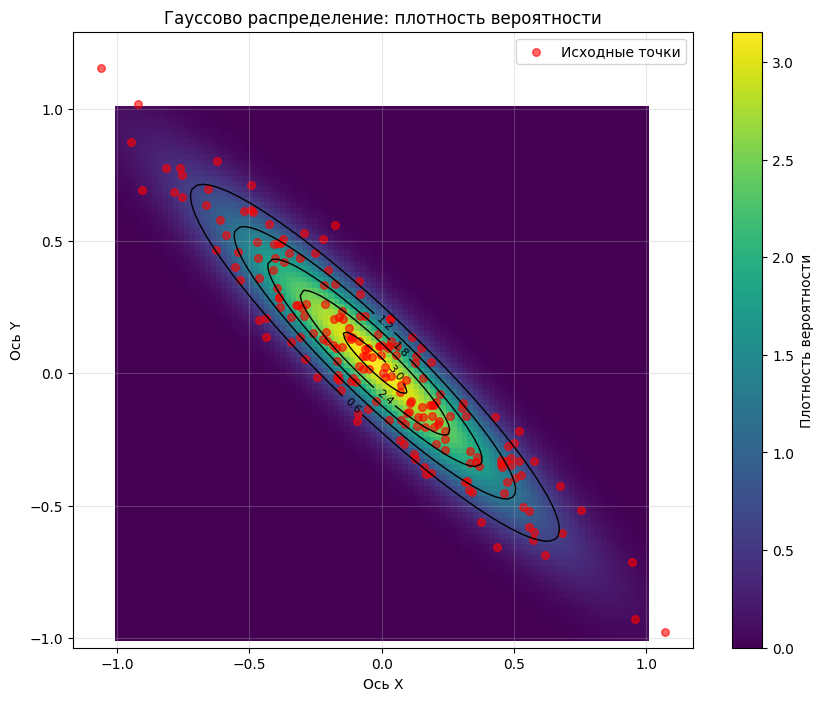

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

print("\n=== 2. ФУНКЦИЯ ПЛОТНОСТИ ВЕРОЯТНОСТИ ===")

#  1. ОЦЕНИВАЕМ ПАРАМЕТРЫ РАСПРЕДЕЛЕНИЯ
# (используем данные из предыдущего примера)
mean_estimated = np.mean(data_rotated, axis=0)  # Среднее значение
cov_estimated = np.cov(data_rotated.T)          # Ковариационная матрица

print(f"Среднее значение: {mean_estimated}")
print(f"Ковариационная матрица:\n{cov_estimated}")

#  2. СОЗДАЕМ СЕТКУ ДЛЯ РАСЧЕТОВ
x_grid = np.linspace(-1, 1, 100)    # 100 точек от -1 до 1 по X
y_grid = np.linspace(-1, 1, 100)    # 100 точек от -1 до 1 по Y
X, Y = np.meshgrid(x_grid, y_grid)  # Создаем сетку координат

# Преобразуем в точки для расчета
grid_points = np.column_stack((X.flatten(), Y.flatten()))

#  3. СЧИТАЕМ ВЕРОЯТНОСТИ
gaussian = multivariate_normal(mean=mean_estimated, cov=cov_estimated)
Z = gaussian.pdf(grid_points).reshape(X.shape)  # Плотность вероятности

#  4. ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(10, 8))

# Цветная карта плотности
heatmap = plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.colorbar(heatmap, label='Плотность вероятности')

# Исходные точки данных
plt.scatter(data_rotated[:, 0], data_rotated[:, 1], alpha=0.6,
           color='red', s=30, label='Исходные точки')

# Линии уровня (где вероятность одинаковая)
contour_lines = plt.contour(X, Y, Z, levels=5, colors='black', linewidths=1)
plt.clabel(contour_lines, inline=True, fontsize=8)

plt.title('Гауссово распределение: плотность вероятности')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()


=== 3. CLASIFICACIÓN BINARIA CON MODELO GENERATIVO GAUSSIANO ===
Prior clase 0: 0.500
Prior clase 1: 0.500


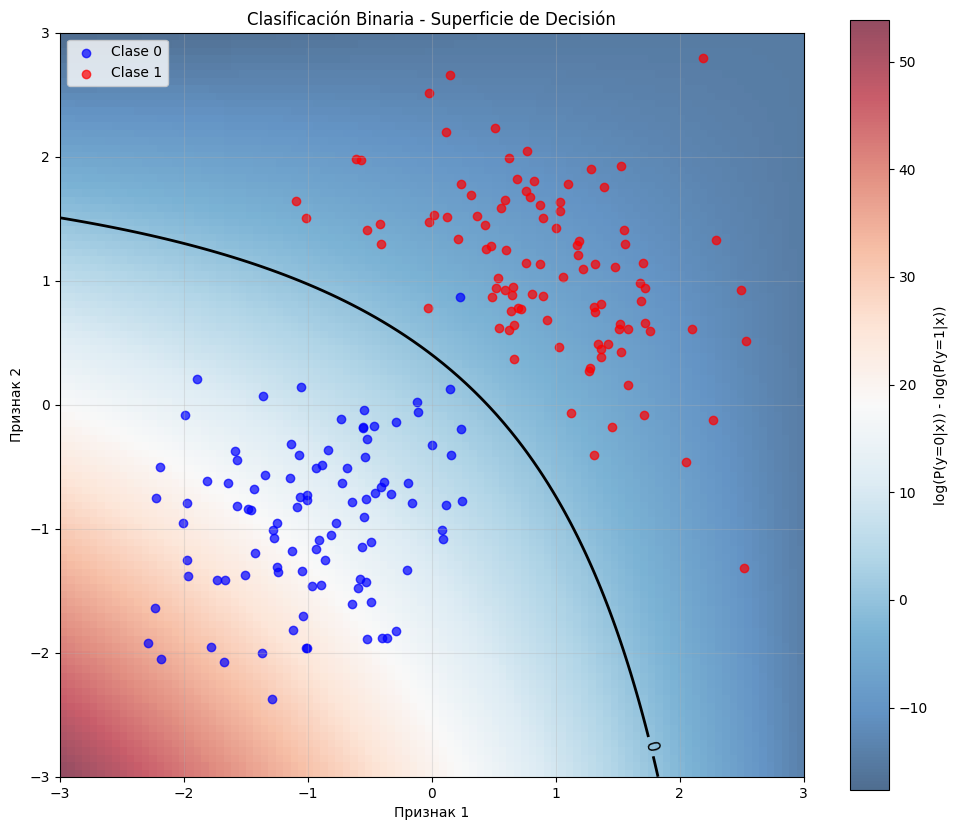

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n=== 3. CLASIFICACIÓN BINARIA CON MODELO GENERATIVO GAUSSIANO ===")  # БИНАРНАЯ КЛАССИФИКАЦИЯ С ГАУССОВСКИМ ГЕНЕРАТИВНЫМ МОДЕЛЕМ

# Generar datos para dos clases
np.random.seed(42)  # Фиксируем seed для воспроизводимости
n_samples = 200

# Clase 0
mu0 = [-1, -1]  # Среднее значение класса 0
cov0 = [[0.5, 0.2], [0.2, 0.5]]  # Ковариационная матрица класса 0
X0 = np.random.multivariate_normal(mu0, cov0, n_samples//2)  # Генерация данных класса 0
y0 = np.zeros(n_samples//2)  # Метки класса 0 (все нули)

# Clase 1
mu1 = [1, 1]  # Среднее значение класса 1
cov1 = [[0.5, -0.2], [-0.2, 0.5]]  # Ковариационная матрица класса 1 (отрицательная корреляция)
X1 = np.random.multivariate_normal(mu1, cov1, n_samples//2)  # Генерация данных класса 1
y1 = np.ones(n_samples//2)  # Метки класса 1 (все единицы)

# Combinar datos - Объединение данных
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Calcular parámetros para cada clase
mu0_est = np.mean(X0, axis=0)
mu1_est = np.mean(X1, axis=0)
cov0_est = np.cov(X0.T)  # Оценка ковариационной матрицы класса 0
cov1_est = np.cov(X1.T)
prior0 = len(X0) / len(X)  # Априорная вероятность класса 0
prior1 = len(X1) / len(X)

print(f"Prior clase 0: {prior0:.3f}")  # Априорная вероятность класса 0
print(f"Prior clase 1: {prior1:.3f}")

# Функция для вычисления логарифма вероятности (избегает численного переполнения)
def log_gaussian_pdf(x, mu, cov):
    n = len(mu)  # Размерность пространства
    cov_det = np.linalg.det(cov)  # Определитель ковариационной матрицы
    cov_inv = np.linalg.inv(cov)  # Обратная ковариационная матрица
    diff = x - mu  # Разность между точкой и средним
    exponent = -0.5 * diff.T @ cov_inv @ diff  # Квадратичная форма Махаланобиса
    constant = -0.5 * (n * np.log(2 * np.pi) + np.log(cov_det))  # Нормировочная константа
    return constant + exponent  # Логарифм плотности вероятности

# Создание сетки для оценки
xx = np.linspace(-3, 3, 100)  # Координата x от -3 до 3
yy = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(xx, yy)  # Сетка координат
grid_points = np.stack((XX.flatten(), YY.flatten()), axis=1)  # Точки сетки в виде массива

# Вычисление разности логарифмов вероятностей для каждой точки сетки
decision_values = np.zeros(len(grid_points))  # Инициализация массива решающих значений

for i, point in enumerate(grid_points):
    log_p0 = log_gaussian_pdf(point, mu0_est, cov0_est) + np.log(prior0)  # Логарифм P(x|0)P(0)
    log_p1 = log_gaussian_pdf(point, mu1_est, cov1_est) + np.log(prior1)  # Логарифм P(x|1)P(1)
    decision_values[i] = log_p0 - log_p1  # Разность логарифмов (решающее правило)

decision_map = decision_values.reshape(XX.shape)  # Преобразование в форму сетки

# Визуализация
plt.figure(figsize=(12, 10))
plt.imshow(decision_map, extent=[-3, 3, -3, 3], origin='lower',
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя цветовая карта
plt.colorbar(label='log(P(y=0|x)) - log(P(y=1|x))')  # Цветовая шкала: разность логарифмов вероятностей

plt.scatter(X0[:, 0], X0[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0 (синий)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1 (красный)

# Граница решения (где разность равна 0)
contour = plt.contour(XX, YY, decision_map, levels=[0], colors='black', linewidths=2)
plt.clabel(contour, inline=True, fontsize=12)

plt.title('Clasificación Binaria - Superficie de Decisión')  # Бинарная классификация - Поверхность решения
plt.xlabel('Признак 1')  # Característica 1
plt.ylabel('Признак 2')  # Característica 2
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


=== 4. ЛИНЕЙНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (LDA) ===


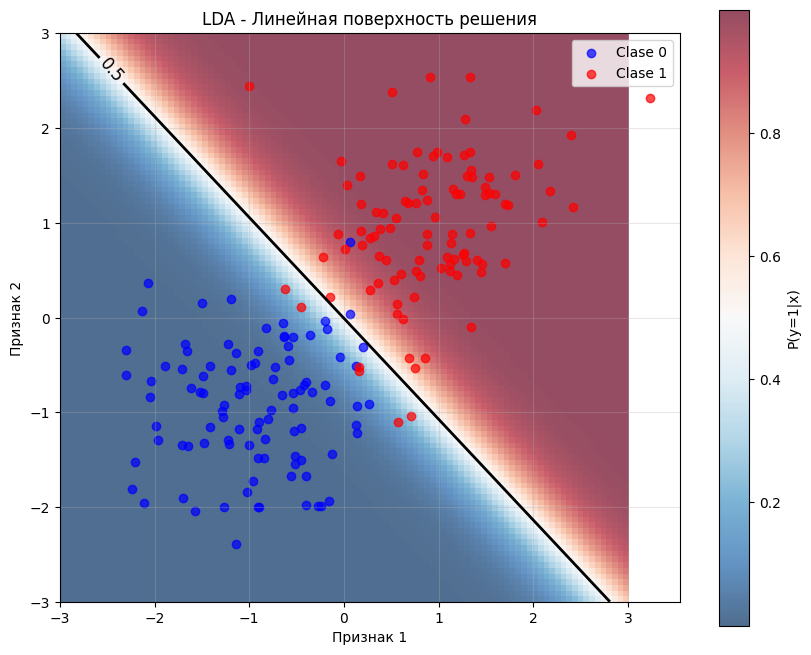

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("\n=== 4. ЛИНЕЙНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (LDA) ===")  # ANÁLISIS DISCRIMINANTE LINEAL (LDA)

class myLDA(BaseEstimator):  # Собственная реализация LDA
    def __init__(self):
        self.mu0 = None  # Среднее класса 0
        self.mu1 = None  # Среднее класса 1
        self.shared_cov = None  # Общая ковариационная матрица
        self.prior0 = None  # Априорная вероятность класса 0
        self.prior1 = None  # Априорная вероятность класса 1
        self.coef_ = None  # Коэффициенты линейной функции
        self.intercept_ = None  # Свободный член

    def fit(self, X, y):
        # Разделение данных по классам
        X0 = X[y == 0]  # Данные класса 0
        X1 = X[y == 1]  # Данные класса 1

        # Вычисление средних и априорных вероятностей
        self.mu0 = np.mean(X0, axis=0)  # Среднее класса 0
        self.mu1 = np.mean(X1, axis=0)  # Среднее класса 1
        self.prior0 = len(X0) / len(X)  # P(y=0)
        self.prior1 = len(X1) / len(X)  # P(y=1)

        # Вычисление общей ковариационной матрицы
        cov0 = np.cov(X0.T) if len(X0) > 1 else np.zeros((X.shape[1], X.shape[1]))  # Ковариация класса 0
        cov1 = np.cov(X1.T) if len(X1) > 1 else np.zeros((X.shape[1], X.shape[1]))  # Ковариация класса 1
        # Объединенная ковариация
        self.shared_cov = (cov0 * (len(X0) - 1) + cov1 * (len(X1) - 1)) / (len(X) - 2)

        # Calcular coeficientes para la función discriminante lineal - Вычисление коэффициентов линейной дискриминантной функции
        cov_inv = np.linalg.inv(self.shared_cov)  # Обратная матрица ковариации
        self.coef_ = cov_inv @ (self.mu1 - self.mu0)  # Коэффициенты w
        # Свободный член b
        self.intercept_ = (-0.5 * self.mu1.T @ cov_inv @ self.mu1 +
                          0.5 * self.mu0.T @ cov_inv @ self.mu0 +
                          np.log(self.prior1 / self.prior0))  # Логарифм отношения априорных вероятностей

        return self

    def predict(self, X):
        # Calcular score lineal - Вычисление линейного скора
        scores = X @ self.coef_ + self.intercept_  # w^T x + b
        return (scores > 0).astype(int)  # Пороговая функция (0.5)

    def predict_proba(self, X):
        # Calcular probabilidades usando función sigmoide  # Вычисление вероятностей через сигмоиду
        scores = X @ self.coef_ + self.intercept_  # w^T x + b
        probs_1 = 1 / (1 + np.exp(-scores))  # Сигмоида: P(y=1|x)
        return np.column_stack([1 - probs_1, probs_1])  # [P(y=0|x), P(y=1|x)]

# Генерация данных с одинаковой ковариацией но разными средними
np.random.seed(42)
n_samples = 200
shared_cov = [[0.5, 0.1], [0.1, 0.5]]  # Общая ковариационная матрица

# Clase 0
mu0_lda = [-1, -1]
X0_lda = np.random.multivariate_normal(mu0_lda, shared_cov, n_samples//2)  # Данные
y0_lda = np.zeros(n_samples//2)  # Метки

# Clase 1
mu1_lda = [1, 1]  # Среднее
X1_lda = np.random.multivariate_normal(mu1_lda, shared_cov, n_samples//2)  # Данные
y1_lda = np.ones(n_samples//2)  # Метки

# Объединение данных
X_lda = np.vstack((X0_lda, X1_lda))  # Признаки
y_lda = np.hstack((y0_lda, y1_lda))  # Метки

# Entrenar LDA - Обучение LDA
lda = myLDA()  # Создание модели
lda.fit(X_lda, y_lda)  # Обучение на данных

# Visualización LDA
plt.figure(figsize=(10, 8))

# Создание сетки
xx = np.linspace(-3, 3, 100)  # Ось X
yy = np.linspace(-3, 3, 100)  # Ось Y
XX, YY = np.meshgrid(xx, yy)  # Сетка координат
grid_points = np.stack((XX.flatten(), YY.flatten()), axis=1)  # Точки сетки

# Predecir probabilidades - Предсказание вероятностей
probs = lda.predict_proba(grid_points)[:, 1]  # P(y=1|x) для каждой точки
decision_map_lda = probs.reshape(XX.shape)  # Преобразование в форму сетки

# Graficar mapa de probabilidad - Карта вероятностей
plt.imshow(decision_map_lda, extent=[-3, 3, -3, 3], origin='lower',
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя карта
plt.colorbar(label='P(y=1|x)')  # Цветовая шкала: P(y=1|x)

# Graficar puntos
plt.scatter(X0_lda[:, 0], X0_lda[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0
plt.scatter(X1_lda[:, 0], X1_lda[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1

# Graficar línea de decisión  # Линия решения (P(y=1|x)=0.5)
contour = plt.contour(XX, YY, decision_map_lda, levels=[0.5], colors='black', linewidths=2)
plt.clabel(contour, inline=True, fontsize=12)

plt.title('LDA - Линейная поверхность решения')  # LDA - Superficie de Decisión Lineal
plt.xlabel('Признак 1')  # Característica 1
plt.ylabel('Признак 2')  # Característica 2
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



=== 5. КЛАССИФИКАТОР NAIVE BAYES ===


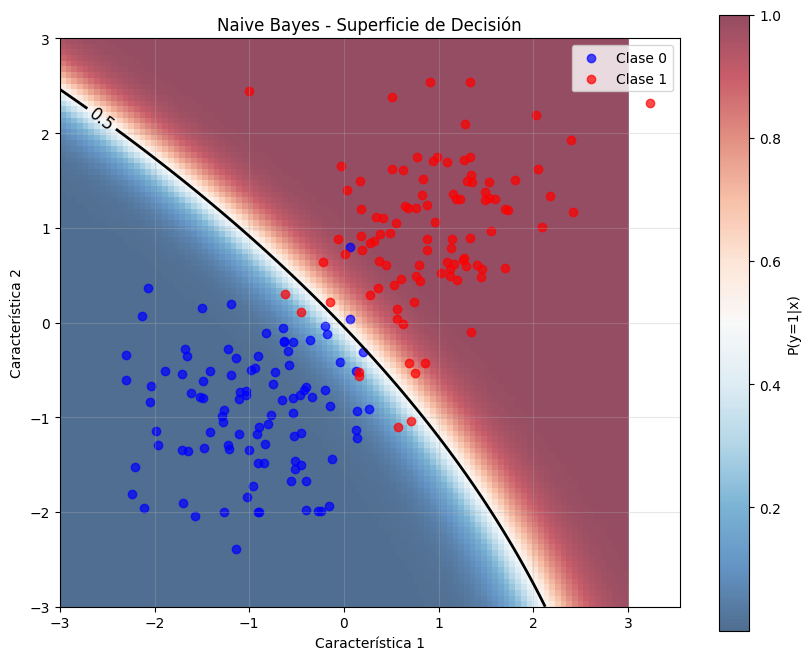

In [5]:
print("\n=== 5. КЛАССИФИКАТОР NAIVE BAYES ===")  # CLASIFICADOR NAIVE BAYES

class myNB(BaseEstimator):  # Собственная реализация Naive Bayes
    def __init__(self):
        self.mu0 = None  # Средние класса 0
        self.mu1 = None  # Средние класса 1
        self.var0 = None  # Дисперсии класса 0
        self.var1 = None  # Дисперсии класса 1
        self.prior0 = None  # Априорная вероятность класса 0
        self.prior1 = None  # Априорная вероятность класса 1

    def fit(self, X, y):
        # Разделение данных по классам
        X0 = X[y == 0]  # Данные класса 0
        X1 = X[y == 1]  # Данные класса 1

        # Вычисление средних, дисперсий и априорных вероятностей
        self.mu0 = np.mean(X0, axis=0)  # Средние класса 0 по каждому признаку
        self.mu1 = np.mean(X1, axis=0)
        self.var0 = np.var(X0, axis=0)  # Дисперсии класса 0 по каждому признаку
        self.var1 = np.var(X1, axis=0)
        self.prior0 = len(X0) / len(X)  # P(y=0)
        self.prior1 = len(X1) / len(X)  # P(y=1)

        # Добавление константы чтобы избежать деления на ноль
        self.var0 = np.where(self.var0 == 0, 1e-10, self.var0)
        self.var1 = np.where(self.var1 == 0, 1e-10, self.var1)

        return self

    def _gaussian_pdf(self, x, mu, var):
        # Функция плотности одномерного нормального распределения
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * (x - mu)**2 / var)  # Формула Гаусса

    def predict_proba(self, X):
        # Calcular log-probabilidades para evitar underflow  # Вычисление логарифмов вероятностей для избежания переполнения
        log_probs_0 = np.log(self.prior0) + np.sum(np.log(self._gaussian_pdf(X, self.mu0, self.var0)), axis=1)  # log P(x|0)P(0)
        log_probs_1 = np.log(self.prior1) + np.sum(np.log(self._gaussian_pdf(X, self.mu1, self.var1)), axis=1)  # log P(x|1)P(1)

        # Normalizar probabilidades  # Нормализация вероятностей
        max_log = np.maximum(log_probs_0, log_probs_1)  # Максимум для стабильности
        probs_0 = np.exp(log_probs_0 - max_log)  # P(x|0)P(0)
        probs_1 = np.exp(log_probs_1 - max_log)  # P(x|1)P(1)
        total = probs_0 + probs_1  # Сумма вероятностей

        return np.column_stack([probs_0 / total, probs_1 / total])  # Нормализованные вероятности

    def predict(self, X):
        probs = self.predict_proba(X)  # Вероятности классов
        return (probs[:, 1] > 0.5).astype(int)  # Пороговая классификация

# Entrenar Naive Bayes con los mismos datos - Обучение Naive Bayes на тех же данных
nb = myNB()  # Создание модели
nb.fit(X_lda, y_lda)  # Обучение модели

# Visualización Naive Bayes  # Визуализация Naive Bayes
plt.figure(figsize=(10, 8))

# Predecir probabilidades - Предсказание вероятностей
probs_nb = nb.predict_proba(grid_points)[:, 1]  # P(y=1|x)
decision_map_nb = probs_nb.reshape(XX.shape)  # Преобразование в форму сетки

# Карта вероятностей
plt.imshow(decision_map_nb, extent=[-3, 3, -3, 3], origin='lower',
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя карта
plt.colorbar(label='P(y=1|x)')  # Цветовая шкала

# Точки данных
plt.scatter(X0_lda[:, 0], X0_lda[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0
plt.scatter(X1_lda[:, 0], X1_lda[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1

# Graficar línea de decisión  # Линия решения
contour = plt.contour(XX, YY, decision_map_nb, levels=[0.5], colors='black', linewidths=2)  # Контур P(y=1|x)=0.5
plt.clabel(contour, inline=True, fontsize=12)  # Подписи

plt.title('Naive Bayes - Superficie de Decisión')  # Naive Bayes - Поверхность решения
plt.xlabel('Característica 1')  # Признак 1
plt.ylabel('Característica 2')  # Признак 2
plt.legend()  # Легенда
plt.grid(True, alpha=0.3)  # Сетка
plt.show()  # Показать график

In [6]:
print("=== 6. СРАВНЕНИЕ LDA И NAIVE BAYES ===")  # COMPARACIÓN LDA vs NAIVE BAYES

# Crear dataset de clasificación binaria (2 características, 2 informativas)  - Создание бинарного набора данных
X, y = make_classification(
    n_samples=1000,        # 1000 samples
    n_features=2,          # Только 2 признака
    n_informative=2,       # Las 2 características son informativas  # Оба признака информативные
    n_redundant=0,         # Нет избыточных признаков
    n_repeated=0,          # Нет повторяющихся признаков
    n_classes=2,
    random_state=42        # Фиксированный seed для воспроизводимости
)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70/30 разделение

# Entrenar modelos  - Обучение моделей
lda = myLDA()  # Линейный дискриминантный анализ
nb = myNB()    # Наивный Байес

lda.fit(X_train, y_train)  # Обучение LDA
nb.fit(X_train, y_train)   # Обучение Naive Bayes

# Hacer predicciones  - Прогнозирование
y_pred_lda = lda.predict(X_test)  # Предсказания LDA
y_pred_nb = nb.predict(X_test)    # Предсказания Naive Bayes

# Calcular métricas - Вычисление метрик
accuracy_lda = accuracy_score(y_test, y_pred_lda)  # Точность LDA
accuracy_nb = accuracy_score(y_test, y_pred_nb)    # Точность Naive Bayes

precision_lda = precision_score(y_test, y_pred_lda, zero_division=0)  # Точность (precision) LDA
precision_nb = precision_score(y_test, y_pred_nb, zero_division=0)    # Точность (precision) Naive Bayes

recall_lda = recall_score(y_test, y_pred_lda, zero_division=0)  # Полнота (recall) LDA
recall_nb = recall_score(y_test, y_pred_nb, zero_division=0)    # Полнота (recall) Naive Bayes

# Mostrar resultados  - Вывод результатов
print("\nRESULTADOS:")  # РЕЗУЛЬТАТЫ:
print(f"LDA - Accuracy: {accuracy_lda:.3f}, Precision: {precision_lda:.3f}, Recall: {recall_lda:.3f}")
print(f"NB  - Accuracy: {accuracy_nb:.3f}, Precision: {precision_nb:.3f}, Recall: {recall_nb:.3f}")

# Comparación simple  # Простое сравнение
if accuracy_lda > accuracy_nb:
    print("\nLDA показал лучшую производительность")  # Naive Bayes показал лучшую производительность
elif accuracy_nb > accuracy_lda:
    print("\nNaive Bayes показал лучшую производительность")  # Naive Bayes tuvo mejor performance
else:
    print("\nОбе модели показали схожую производительность")  # Ambos modelos tuvieron performance similar

=== 6. СРАВНЕНИЕ LDA И NAIVE BAYES ===

RESULTADOS:
LDA - Accuracy: 0.873, Precision: 0.907, Recall: 0.836
NB  - Accuracy: 0.870, Precision: 0.925, Recall: 0.809

LDA показал лучшую производительность
